In [1]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)

import numpy as np
from array import array
import matplotlib.pyplot as plt
from binding import ConcentrationSweep
from partitions import PartitionFunction, Microstates
from time import time

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
tickpad=2
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.labelpad'] = 1
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.major.pad'] = tickpad
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.minor.size'] = 1
plt.rcParams['ytick.major.pad'] = tickpad
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['ytick.direction'] = 'in'

In [51]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [.96*(a0+c0), a0] 
beta = [.96*(b0+c0), b0] 
gamma = [0, c0] 

params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [52]:
#%%prun -D runtime.prof
start = time()
microstates = Microstates(Ns=12, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=100, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

0.008177995681762695


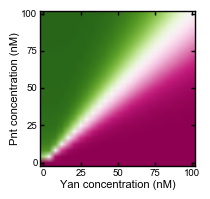

In [53]:
fig = sweep.plot_overall_occupancy(species='Pnt', figsize=(2, 2), cmap=plt.cm.PiYG)
#fig.savefig('unequal.pdf', dpi=400, format='pdf')

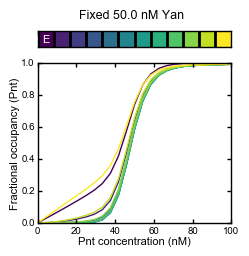

In [9]:
fig = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))
#fig.savefig('unequal_contours.pdf', dpi=400, format='pdf')

In [84]:
cms = microstates.get_c_microstates()
a,b,g = cms.get_energy_contributions()
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()
R = 1.987204118*1E-3
T = 300
gc = np.vstack((a,b,g))
#ec = np.exp(-gc/(R*T))
ec = -gc
contrib = np.dot(probabilities, ec.T)
contrib = contrib / contrib.sum(axis=1).reshape(-1, 1)
contrib = contrib.reshape((sweep.density, sweep.density, 6))
binding = contrib[:,:,:4].sum(axis=-1)
polymerization = 1 - binding

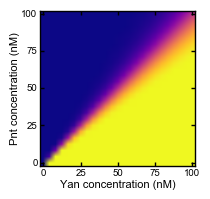

In [86]:
# plot contributions

# create figure

figsize = (2, 2)
name = 'Polymerization'
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=figsize)

# visualize occupancy
cmap = plt.cm.plasma
ax.imshow(polymerization, cmap=cmap, vmin=0, vmax=.5)
ax.invert_yaxis()
ax.set_xlabel('Yan concentration (nM)')
ax.set_ylabel('Pnt concentration (nM)')
ax.set_aspect(1)
sweep.format_ticks(ax)
#fig.savefig('unequal_contributions.pdf', dpi=400, format='pdf')

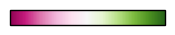

In [121]:
# plot colorbar
cmap = plt.cm.PiYG
fig, ax_cbar = plt.subplots(figsize=(2, .2))
norm = Normalize(0, 0.5)
cbar = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_ticks([])
#fig.savefig('piyg_colorbar.pdf', dpi=400, format='pdf')
#ax_cbar.xaxis.set_ticks_position('top')
#ax_cbar.tick_params(labelsize=8, pad=0)
#label = 'Relative Contribution'
# if name is not None:
#     label = label + ' ({:s})'.format(name)
#cbar.set_label(label, fontsize=8)
#cbar.set_ticks([0, .5])
#cbar.set_ticklabels(['Free binding', 'Polymerization'])
#ax_cbar.tick_params(pad=3)

In [128]:
7/8

0.875

In [100]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [a0, a0] 
beta = [b0, b0] 
gamma = [c0, c0] 
params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [107]:
#%%prun -D runtime.prof
start = time()
microstates = Microstates(Ns=12, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=2, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

19.647157192230225


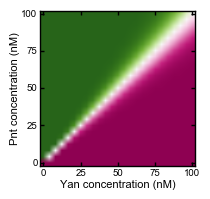

In [89]:
fig = sweep.plot_overall_occupancy(species='Pnt', figsize=(2, 2), cmap=plt.cm.PiYG)
#fig.savefig('equal_poly.pdf', dpi=400, format='pdf')

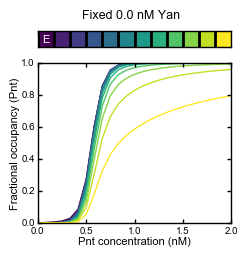

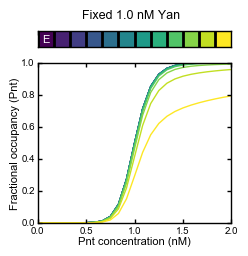

In [112]:
fig0 = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=0, figsize=(2.5, 2.5))
fig1 = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))
#fig0.savefig('no_competition.pdf', dpi=400, format='pdf')
#fig1.savefig('with_competition.pdf', dpi=400, format='pdf')

In [95]:
cms = microstates.get_c_microstates()
a,b,g = cms.get_energy_contributions()
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()
R = 1.987204118*1E-3
T = 300
gc = np.vstack((a,b,g))
#ec = np.exp(-gc/(R*T))
ec = -gc
contrib = np.dot(probabilities, ec.T)
contrib = contrib / contrib.sum(axis=1).reshape(-1, 1)
contrib = contrib.reshape((sweep.density, sweep.density, 6))
binding = contrib[:,:,:4].sum(axis=-1)
polymerization = 1 - binding

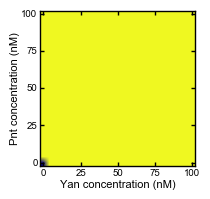

In [99]:
# plot contributions

# create figure
figsize = (2, 2)
name = 'Polymerization'
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=figsize)

# visualize occupancy
cmap = plt.cm.plasma
ax.imshow(polymerization, cmap=cmap, vmin=0, vmax=.5)
ax.invert_yaxis()
ax.set_xlabel('Yan concentration (nM)')
ax.set_ylabel('Pnt concentration (nM)')
ax.set_aspect(1)
sweep.format_ticks(ax)

# # add colorbar
# ax_cbar = plt.subplot(gs[1])
# norm = Normalize(0, 0.5)
# cbar = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal')
# ax_cbar.xaxis.set_ticks_position('top')
# ax_cbar.tick_params(labelsize=8, pad=0)
# label = 'Relative Contribution'
# # if name is not None:
# #     label = label + ' ({:s})'.format(name)
# cbar.set_label(label, fontsize=8)
# cbar.set_ticks([0, .5])
# cbar.set_ticklabels(['Free binding', 'Polymerization'])
# ax_cbar.tick_params(pad=3)

#fig.savefig('equal_poly_contributions.pdf', dpi=400, format='pdf')

In [131]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [a0+c0, a0+c0] 
beta = [b0+c0, b0+c0] 
gamma = [0, 0] 
params = dict(alpha=alpha, beta=beta, gamma=gamma)
R, T = 1.987204118*1E-3, 300  # Kcal/mol/K

In [132]:
#%%prun -D runtime.prof
start = time()
microstates = Microstates(Ns=12, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=100, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

19.835399866104126


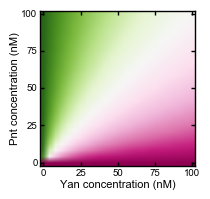

In [133]:
fig = sweep.plot_overall_occupancy(species='Pnt', figsize=(2, 2), cmap=plt.cm.PiYG)
#fig.savefig('equal.pdf', dpi=400, format='pdf')

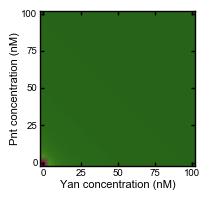

In [135]:
fig = sweep.plot_overall_occupancy(species='total', figsize=(2, 2), cmap=plt.cm.PiYG)

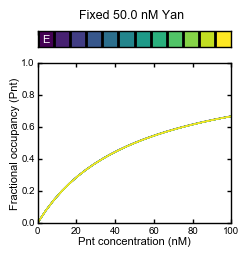

In [49]:
fig = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))
#fig.savefig('equal_contours.pdf', dpi=400, format='pdf')

In [123]:
from partitions import get_ternary_repr

In [127]:
n = 2

for k in range(3**n):
    print(k, list(get_ternary_repr(k)[1]))

0 [0]
1 [1]
2 [2]
3 [0, 1]
4 [1, 1]
5 [2, 1]
6 [0, 2]
7 [1, 2]
8 [2, 2]


In [ ]:
# qiao 2005 - TEL inter-sam domain Kd=2 nM , yan inter-sam domain Kd= 11 uM

Mae inhibits Pointed‐P2 transcriptional activity by blocking its MAPK docking site

In [4]:
R = 1.987204118*1E-3 
T = 300

In [5]:
Kd = 11 * 1e-6
dG = R*T*np.log(Kd)
dG

-6.806739633726429

2.8000000000000003e-08

In [148]:
 R*T*np.log(.85 * 1e-9)

-12.451295248661868

In [6]:
get_free_energy = lambda Kd: R*T*np.log(Kd)

In [7]:
Kd = 11 * 1e-6

get_free_energy(Kd)

-6.806739633726429

In [17]:
# affinity of 27 bp oligonucleotude for ETS1,  Kd = 2.5 +- 0.5  * 1e-11 M
dG_specific = get_free_energy(2.5*1e-11)

# affinity of ETS1 for 9 bp randomly-chosen non-specific oligonucleotide, Kd ~ 10 uM
dG_non_specific9 = get_free_energy(1e-5)

# affinity of ETS1 for 15 bp randomly-chosen non-specific oligonucleotide, Kd < 10 uM
dG_non_specific15 = get_free_energy(1e-6)

In [18]:
print('Specific', dG_specific)
print('Non-specific, 9b', dG_non_specific9)
print('Non-specific, 15b', dG_non_specific15)

Specific -14.5535746955
Non-specific, 9b -6.86355986826
Non-specific, 15b -8.23627184192
